In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

%matplotlib inline
import cv2

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


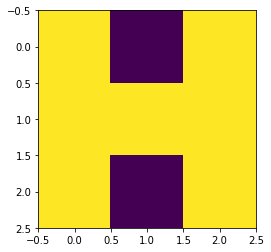

In [59]:
img = np.array([[1,2,3],
               [200,5,200],
               [7,8,9]
               ], dtype='float') #원하는 값 얻고싶은경우 형변환 해주어야 함
                
#convolution, 패딩 값 찾기, 제로패딩이 아니라 리플렉션기법을 사용
detect_kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]
                   ])
kernel = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]
                   ])

filtered = cv2.filter2D(img, -1, detect_kernel)
print(filtered)
plt.imshow(filtered)

[[[  0   0   0]
  [253 253 253]
  [  2   2   2]]

 [[  0   0   0]
  [  1   1   1]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


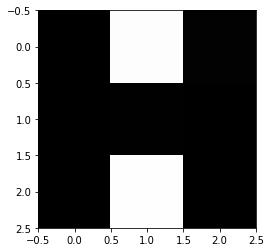

In [45]:
cv2.imwrite('output.jpg',filtered.astype('uint8')) #값이 -2가 나왔지만 보수? 로 인해 254로 나옴
img = cv2.imread('output.jpg')
print(img)
plt.imshow(img)

In [55]:
#정규화
# 색은 기본적으로 0~ 255 값으로 한정되어있기 있다
# 0~ 255 값에 포함되기 위해 정규화 과정이 필요할 수 있다.

#시작값이 0 인경우
#0과 0.7 사이의 값을 0~255로 변경하려면?
# 값을 0.7(최대값)로 나누고 255로 곱한다.

#시작값이 0이 아닌경우
#2와 5 사이의 값을 0~255로 변경하려면?
#값-min/ 5(최대값)-2(최소값) * 255로 곱한다.

#ptp 함수- >max-min
max_v =np.max(filtered)
min_v = np.min(filtered)
#maxmin = np.ptp(filtered)

#정규화
n = (filtered - min_v) / (max_v - min_v) * 255 # -2 ~ 0 을 0 ~ 255로 스케일링
print(n)
print()

#np.abs 는 절대값을 반환
n2 = np.abs(filtered) / (np.max(np.abs(filtered))) * 255 # 0~2로 변환 한 것을 0~255로 스케일링
print(n2)
print()


#OpenCV 를 통해 정규화 진행
norm = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)
norm = norm.astype('uint8')
print(norm)
print()

[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]

[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]

[[255   0 255]
 [255 255 255]
 [255   0 255]]

